# Predicting Chance of Survival for Titanic Passangers
<b>Given a person's...</b>
- socioeconomic status
- sex
- age
- number of sibilings & spouses
- number of parents & children
- ticket price
- cabin id
- town embarked on

<b>Predict the likelihood that they died on Titanic</b>

# Exploratory Data Analysis

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('train.csv')
df = df.set_index('PassengerId')
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [18]:
df.shape

(891, 11)

In [19]:
df.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [20]:
import matplotlib.pyplot as plt

Text(0,0.5,'Percent Died')

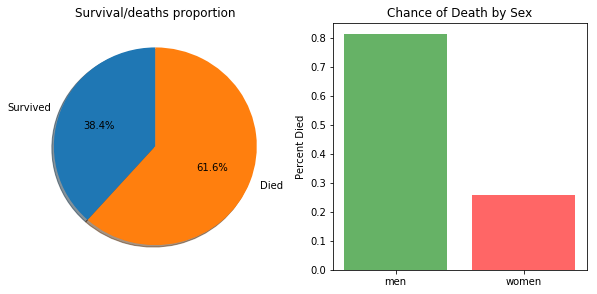

In [78]:
color = ['green', 'red', 'orange']
fig = plt.figure(figsize = (10,10))
fig = fig.tight_layout()

plt.subplot2grid((2,2), (0,0))
plt.title("Survival/deaths proportion")
sizes = [df.loc[df['Survived'] == 1].shape[0], df.loc[df['Survived'] == 0].shape[0]]
plt.pie(sizes, labels=['Survived', 'Died'], autopct='%1.1f%%',
        shadow=True, startangle=90)  

plt.subplot2grid((2,2), (0,1))
plt.title("Chance of Death by Sex")
menWomen = [df.Survived[df['Sex'] == 'male'].value_counts(normalize = True)[0],
            df.Survived[df['Sex'] == 'female'].value_counts(normalize = True)[0]]
menWomenLable = ['men', 'women']
plt.bar(menWomenLable, menWomen, alpha = 0.6, color = color)
plt.ylabel('Percent Died') 

Text(0,0.5,'Percent Died')

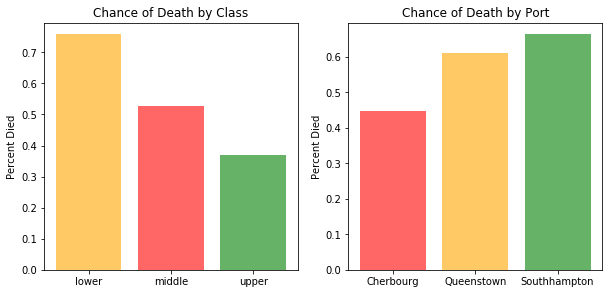

In [79]:
fig = plt.figure(figsize = (10,10))
plt.subplot2grid((2,2), (0,0))
plt.title("Chance of Death by Class")
classLevel = [df.Survived[df['Pclass'] == 1].value_counts(normalize = True)[0],
            df.Survived[df['Pclass'] == 2].value_counts(normalize = True)[0],
            df.Survived[df['Pclass'] == 3].value_counts(normalize = True)[0]]
classLable = ['upper', 'middle', 'lower']
plt.bar(classLable, classLevel, alpha = 0.6, color = color)
plt.ylabel('Percent Died')

plt.subplot2grid((2,2), (0,1))
plt.title("Chance of Death by Port")
classLevel = [df.Survived[df['Embarked'] == 'S'].value_counts(normalize = True)[0],
            df.Survived[df['Embarked'] == 'C'].value_counts(normalize = True)[0],
            df.Survived[df['Embarked'] == 'Q'].value_counts(normalize = True)[0]]
classLable = ['Southhampton', 'Cherbourg', 'Queenstown']
plt.bar(classLable, classLevel, alpha = 0.6, color = color)
plt.ylabel('Percent Died') 

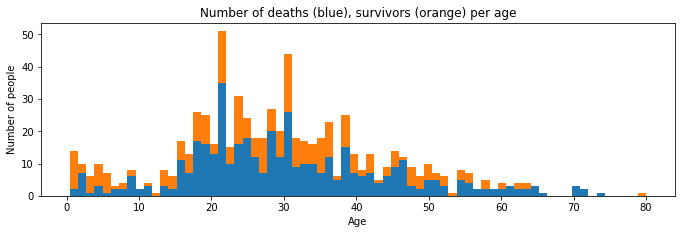

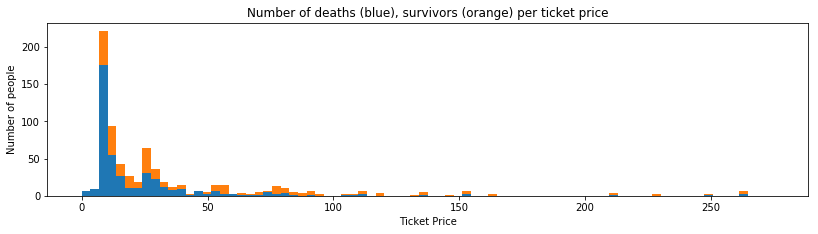

In [23]:
survived = df.loc[df['Survived'] == 1]
survived = survived[pd.notnull(survived['Age'])]

died = df.loc[df['Survived'] == 0]
died = died[pd.notnull(died['Age'])]

fig = plt.figure(figsize = (25,7))
plt.subplot2grid((2,2), (0,0))
plt.hist([died.Age.values, survived.Age.values], 70, stacked=True, label=[])
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Number of deaths (blue), survivors (orange) per age')
plt.show()

fig = plt.figure(figsize = (30,7))
plt.subplot2grid((2,2), (1,0))
plt.hist([died.Fare.values, survived.Fare.values], 80, stacked=True, label=[], range=(0,275))
plt.xlabel('Ticket Price')
plt.ylabel('Number of people')
plt.title('Number of deaths (blue), survivors (orange) per ticket price')
plt.show()

Text(0.5,0,'Ticket price group')

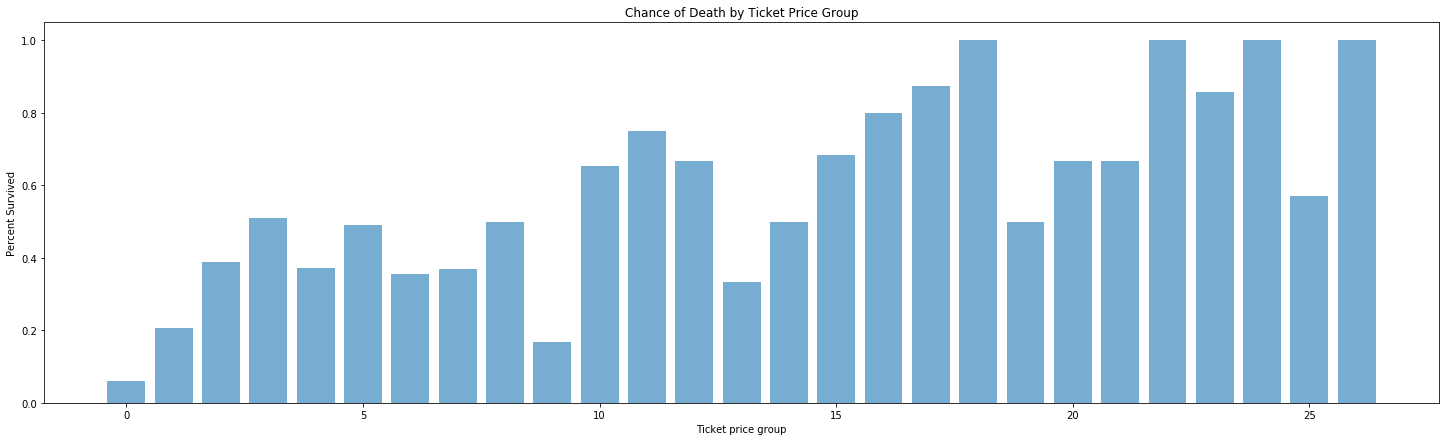

In [24]:
df['FareDiscrete'] = pd.cut(df['Fare'], 100)
labels = sorted(list(df['FareDiscrete'].values.unique()))
values = []
for r in labels:
    sub = df[df['FareDiscrete']==r]
    values.append(sub[sub['Survived']==1].shape[0]/sub.shape[0])
fig = plt.figure(figsize = (25,7))
plt.title("Chance of Death by Ticket Price Group")
plt.bar(range(len(values)-6), values[:-6], alpha = 0.6)
plt.ylabel('Percent Survived') 
plt.xlabel('Ticket price group') 

From the data analysis, we inferred that...

- Chance of death is correlated to socioeconomic class
- Men are more likely to die
- The ages for the ranges 0-18, 18-35, 35 and above exhibited similar patterns
- If you embarked at Southampton, then you were more likely to die
- TODO: how did ticket price relate to chance of death?
- TODO: # spouses/children, # children/parents 

# Feature Selection and Transformations
- Since only 20% of datapoints has a cabin attritue, drop this column
- We assume that name has no relationship with chance of survival -- drop this column
- Change attribute domain for sex: {'male', 'female'} -> {0,1}
- Use ranges of ages; make attribute discrete: (0.18], (18, 35], (35-<above>] 
- To ensure that attribute values are on the same scale, introduce a new column for each discrete value where the column value is a boolean, either 0 or 1

In [25]:
import numpy as np

## Feature Transformations

In [56]:
def ageSet(row):
    if row.Age <= 18:
        age = 0
    elif row.Age <= 35:
        age = 1
    elif row.Age <= 50:
        age = 2
    else:
        age = 3
    return age

In [57]:
# Check if ticket is more expensive or less expensive than mean of Pclass
def ticketPriceSet(row):
    ticketprice = 1 if row.Fare > row.meanTicketPrice else 0
    return ticketprice

In [58]:
def aloneSet(row):
    alone =  1 if (int(row.SibSp) == 0 and int(row.Parch) == 0) else 0
    return alone

In [59]:
def titanicClean(df, ageContinuous = False):
    df = df.set_index('PassengerId')
    if ageContinuous:
        df.Age = df.Age.fillna(method='bfill')
    else:
        df['AgeClass'] = df.apply(ageSet, axis = 1)
        df = df.drop(['Age'], axis=1)
    
    #Create alone
    df['Alone'] = df.apply(aloneSet, axis = 1)

    #find mean of fare
    meanPrice = []
    for i in np.unique(df['Pclass']):
        meanPrice.append(df.Fare[df['Pclass'] == int(i)].mean(axis = 0))
    meanPrice = [0] + meanPrice

    #create column of array out of mean array
    #need to do this b/c apply function is weird
    tempTicketMean = []
    for index, row in df.iterrows():
        tempTicketMean.append(meanPrice[row.Pclass])    

    #Create ticket Price Column
    df['meanTicketPrice'] = tempTicketMean
    df['ticketPrice'] = df.apply(ticketPriceSet, axis = 1)

    df.Embarked = df.Embarked.fillna(value = 'S')
    #Change female to int
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

    df['Embarked'] = df['Embarked'].map({'Q': 1, 'S': 0, 'C':2})
    #drop uneeded columns
    df = df.drop(['Name','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'meanTicketPrice'],axis = 1)
    df = pd.get_dummies(data=df, columns=['Pclass', 'AgeClass', 'Embarked'])
    return df

In [70]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df3 = pd.read_csv('gender_submission.csv')

df1 = titanicClean(df1, ageContinuous = False)
df2 = titanicClean(df2, ageContinuous = False)
df3 = df3.set_index('PassengerId')

df1.head(7)

,Survived,Sex,Alone,ticketPrice,Pclass_1,Pclass_2,Pclass_3,AgeClass_0,AgeClass_1,AgeClass_2,AgeClass_3,Embarked_0,Embarked_1,Embarked_2
PassengerId,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,1,1,0,0,1,0,0,0,0,1,0,0,0,1
3,1,1,1,0,0,0,1,0,1,0,0,1,0,0
4,1,1,0,0,1,0,0,0,1,0,0,1,0,0
5,0,0,1,0,0,0,1,0,1,0,0,1,0,0
6,0,0,1,0,0,0,1,0,0,0,1,0,1,0
7,0,0,1,0,1,0,0,0,0,0,1,1,0,0


In [72]:
def train_data(df):
    y = df.iloc[:, 0].values
    X = df.iloc[:, 1:].values
    return X, y

def test_data(df1, df2):
    X = df1.values
    y = df2.values
    y = y.flatten()
    return X, y

X_train, y_train = train_data(df1)
X_test, y_test = test_data(df2, df3)

# Baseline Model

In [73]:
# If upperclass, women, or child younger than 12, then survive, else die
def baseLine(row):
    if row.Pclass == 1:
        survived = 1
    elif row.Sex == 'female':
        survived = 1
    elif row.Age <= 12:
        survived = 1
    else:
        survived = 0
    return str(row.PassengerId) + " " + str(survived)

def baselinePredict(X):
    predict = X.apply(baseLine, axis = 1)
    return  pd.DataFrame(predict.str.split(' ',1).tolist(),
                         columns = ['PassengerId','Predict']).apply(pd.to_numeric)

In [74]:
def scoreBaseline(test):
    predict = baselinePredict(test)
    merged = pd.merge(test,predict)
    answers = pd.read_csv('gender_submission.csv')
    final = pd.merge(merged, answers, on = 'PassengerId')
    print('Baseline Predition')
    print((final.Survived == final.Predict * 1).sum()/ merged.shape[0])

In [75]:
dfTest = pd.read_csv('test.csv')
scoreBaseline(dfTest)

Baseline Predition
0.8349282296650717


# Predictions

In [76]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

# our implementations
from dtree import DecisionTree
from dforest import DecisionForest

In [77]:
clfs = [SVC(C=1.0, kernel='rbf'), 
        LinearSVC(penalty='l2', C=1.0, max_iter=1000),
        LogisticRegression(),
        DecisionTreeClassifier(max_depth=4, splitter='best'),
        RandomForestClassifier(n_estimators = 3, max_depth=4),
        DecisionTree(max_depth=4),
        DecisionForest(n_estimators=5, bootstrap=True)]

for clf in clfs:
    clf.fit(X_train, y_train)
    print("%s: \t[%f/%f]" % (clf.__class__.__name__, clf.score(X_train, y_train), clf.score(X_test, y_test)) )
    if isinstance(clf, DecisionTreeClassifier):
        sklearn.tree.export_graphviz(clf, out_file='tree.dot')

SVC: 	[0.792368/0.995215]
LinearSVC: 	[0.802469/0.964115]
LogisticRegression: 	[0.810325/0.935407]
DecisionTreeClassifier: 	[0.820426/0.873206]
RandomForestClassifier: 	[0.765432/0.811005]
DecisionTree: 	[0.830527/0.885167]
DecisionForest: 	[0.830527/0.861244]


In [ ]:
# rescaling made it better
# did better for the test set (Kaggle did poor job)
# look at more levels below?